<a href="https://colab.research.google.com/github/pri538/NP-Projects/blob/main/Suicide_Prediction_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
dataset = pd.read_csv('/content/Suicide_Ideation_Dataset(Twitter-based).csv')
dataset.head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1785 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1785 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 41.8+ KB


In [ ]:
dataset.dropna(inplace = True)
dataset.isnull().sum()

Tweet      0
Suicide    0
dtype: int64

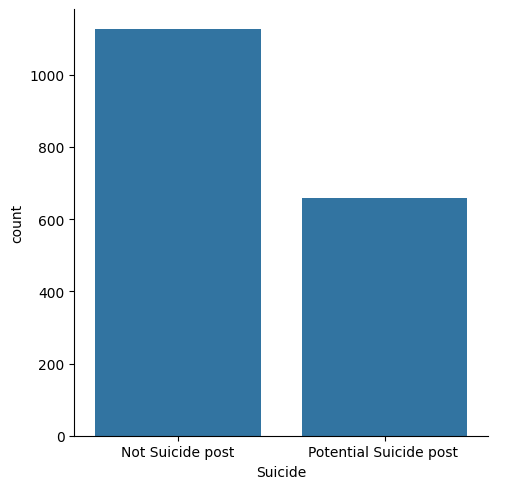

In [ ]:
sns.catplot(dataset, x = 'Suicide', kind = 'count')

In [ ]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
dataset['Tweet'] = dataset['Tweet'].str.lower()

In [ ]:
dataset.head(2)

,Tweet,Suicide
0,make lunch,0
1,alexia want money,0


In [ ]:
def preprocessor(text):
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = word_tokenize(text.lower())
    text = [PorterStemmer().stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    return text

In [ ]:
dataset['Tweet'] = dataset['Tweet'].apply(preprocessor)

In [ ]:
dataset.head()

,Tweet,Suicide
0,make lunch,0
1,alexia want money,0
2,dizzyhrvi crap took forev put togeth go go sle...,1
3,jnaylor kiwitweet hey jer sinc start twitter,0
4,tri quot delici librari quot mix result bar co...,0


In [ ]:
nltk.download('punkt')
dataset['Tweet'] = dataset['Tweet'].apply(preprocessor)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
X = dataset.iloc[:,0:1]
y = dataset['Suicide']

In [ ]:
y = encoder.fit_transform(y)
y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [ ]:
print(X_train.shape)

(1428, 1)


In [ ]:
print(X_test.shape)

(357, 1)


In [ ]:
print(y_train.shape)

(1428,)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [ ]:
X_train_bow = cv.fit_transform(X_train['Tweet']).toarray()
X_test_bow = cv.transform(X_test['Tweet']).toarray()

In [ ]:
X_train_bow.shape

(1428, 4501)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

dataset['Suicide'] = encoder.fit_transform(dataset['Suicide'])
dataset.head()

,Tweet,Suicide
0,make lunch,0
1,alexia want money,0
2,dizzyhrvi crap took forev put togeth go go sle...,1
3,jnaylor kiwitweet hey jer sinc start twitter,0
4,tri quot delici librari quot mix result bar co...,0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5220)
X = cv.fit_transform(dataset['Tweet']).toarray()
y = dataset.iloc[:, -1].values

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

In [ ]:
def classalgo_test(x_train,x_test,y_train,y_test): #classification

    g=GaussianNB()
    b=BernoulliNB()
    rfc=RandomForestClassifier()
    gbc=GradientBoostingClassifier()
    xgb=XGBClassifier()
    Bagging=BaggingClassifier()
    AdaBoost=AdaBoostClassifier()

    algos = [g,b,rfc,gbc,xgb,Bagging,AdaBoost]
    algo_names = ['GaussianNB','BernoulliNB','RandomForestClassifier','GradientBoostingClassifier','BaggingClassifier','XGBClassifier','AdaBoostClassifier']
    Train_acc=[]
    Train_precsc=[]
    Train_fsc=[]
    Train_Recall=[]
    Test_acc=[]
    Test_precsc=[]
    Test_fsc=[]
    Test_Recall=[]
    Test_AUC=[]

    result = pd.DataFrame(index = algo_names)

    for algo in algos:

        algo.fit(x_train,y_train)
        y_train_pred = algo.predict(x_train)
        y_test_pred = algo.predict(x_test)
        Train_acc.append(accuracy_score(y_train,y_train_pred))
        Train_precsc.append(precision_score(y_train,y_train_pred))
        Train_fsc.append(f1_score(y_train,y_train_pred))
        Train_Recall.append(recall_score(y_train,y_train_pred,average='micro'))


        Test_acc.append(accuracy_score(y_test,y_test_pred))
        Test_precsc.append(precision_score(y_test,y_test_pred))
        Test_fsc.append(f1_score(y_test,y_test_pred))
        Test_Recall.append(recall_score(y_test,y_test_pred,average='micro'))
        Test_AUC.append(roc_auc_score(y_test,y_test_pred))


    result['Train_Accuracy Score'] = Train_acc
    result['Train_Precision Score'] = Train_precsc
    result['Train_F1Score']= Train_fsc
    result['Train_Recall']= Train_Recall
    result['Test_Accuracy Score'] = Test_acc
    result['Test_Precision Score'] = Test_precsc
    result['Test_F1Score']= Test_fsc
    result['Test_Recall']= Test_Recall
    result['Test_AUC_Score']= Test_AUC

    return result.sort_values('Test_Accuracy Score', ascending=False)

In [ ]:
classalgo_test(X_train_bow,X_test_bow,y_train,y_test)

,Train_Accuracy Score,Train_Precision Score,Train_F1Score,Train_Recall,Test_Accuracy Score,Test_Precision Score,Test_F1Score,Test_Recall,Test_AUC_Score
BaggingClassifier,0.977591,0.989879,0.968317,0.977591,0.946779,0.942857,0.932862,0.946779,0.942847
RandomForestClassifier,1.000000,1.000000,1.000000,1.000000,0.935574,0.934783,0.918149,0.935574,0.930021
XGBClassifier,0.994398,0.996094,0.992218,0.994398,0.935574,0.934783,0.918149,0.935574,0.930021
GradientBoostingClassifier,0.960084,0.985201,0.942366,0.960084,0.929972,0.940299,0.909747,0.929972,0.921868
AdaBoostClassifier,0.956583,0.952191,0.939096,0.956583,0.918768,0.895833,0.898955,0.918768,0.916002
BernoulliNB,0.922269,0.997543,0.879740,0.922269,0.831933,0.977011,0.739130,0.831933,0.792530
GaussianNB,0.950980,0.880546,0.936479,0.950980,0.655462,0.542373,0.675462,0.655462,0.695216


In [ ]:
bg=BaggingClassifier()
bg.fit(X_train_bow,y_train)

BaggingClassifier()

In [ ]:
bg_predict=bg.predict(X_test_bow)

In [ ]:
print(confusion_matrix(y_test,bg_predict))

[[206   8]
 [ 14 129]]


<Axes: >

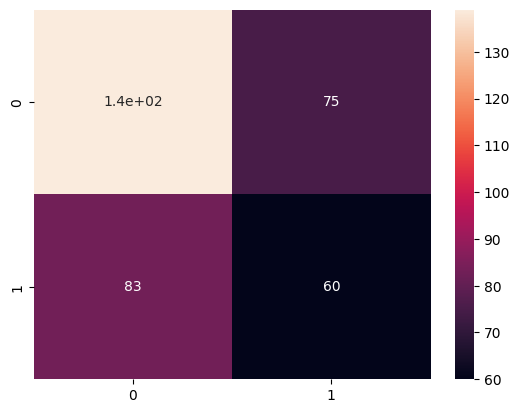

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       214
           1       0.44      0.42      0.43       143

    accuracy                           0.56       357
   macro avg       0.54      0.53      0.53       357
weighted avg       0.55      0.56      0.56       357

